In [16]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from functools import partial

from manifold import mirror_vecs
from bures_wasserstein import BuresWasserstein as BW, sym


def mixture(key, x0, x1, p):
    num_dims = len(x0.shape) - 1
    shape = (x0.shape[0], *[1 for _ in range(num_dims)])
    z = jax.random.choice(
        key, jnp.array([0.0, 1.0]), shape=shape, p=jnp.array([p, 1 - p])
    )
    return z * x0 + (1.0 - z) * x1


@partial(jax.jit, static_argnums=(1,))
def sample(key, n, mu):
    A = jnp.sqrt(0.25) * jax.random.normal(key, (n, mu.shape[0], mu.shape[0]))
    return jax.vmap(lambda A: BW.exp(mu, sym(A)))(A)

(0.0, 0.02)

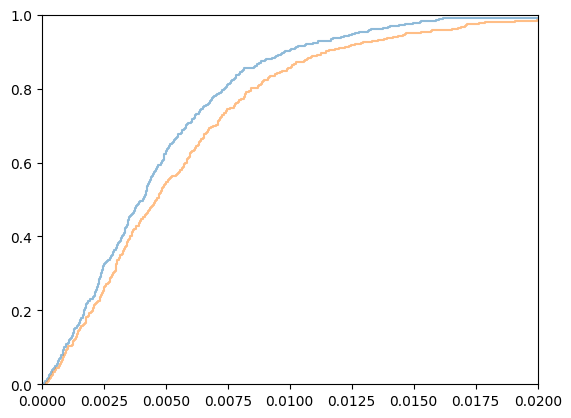

In [22]:
key = jax.random.PRNGKey(np.random.randint(0, 2**32))
key, mc_key, x_key, z_key = jax.random.split(key, 4)

mc_repeats = 500

mu_0 = jnp.eye(2)

n = 400


def proc(key):
    key_z, key_fm = jax.random.split(key)
    return BW.dist(mu_0, BW.frechet_mean(sample(key_z, n, mu_0), key_fm)) ** 2


x_dist = jax.vmap(proc)(jax.random.split(mc_key, mc_repeats))

x_ref = sample(key, n, mu_0)
x_ref_mirrored = mirror_vecs(BW, mu_0, x_ref)


z_dist = jax.vmap(proc)(jax.random.split(z_key, mc_repeats))

plt.ecdf(
    x_dist[~jnp.isnan(x_dist)],
    alpha=0.5,
)
plt.ecdf(
    z_dist[~jnp.isnan(z_dist)],
    alpha=0.5,
)
plt.xlim(0, 2e-2)

In [18]:
x_dist

Array([5.40983723e-03, 1.31742945e-02, 1.49261951e-02, 6.20055199e-03,
       3.43549228e-03, 5.46216965e-04, 3.20351124e-03, 9.22989845e-03,
       3.63004231e-03, 4.48107690e-04, 6.18076371e-03, 5.32436371e-03,
       4.38964367e-03, 1.64043892e-03, 1.97396278e-02, 1.97398663e-03,
       9.98449232e-03, 5.50079346e-03, 4.54282761e-03, 1.12495422e-02,
       3.43918777e-03, 5.05614281e-03, 1.01697457e-03, 2.16579437e-03,
       2.52759457e-03, 3.27134132e-03, 5.56707382e-03, 1.97849255e-02,
       3.73005844e-03, 6.77466393e-04, 1.00684154e-03, 1.10569000e-02,
       1.06070051e-02, 4.58168983e-03, 2.90644169e-03, 4.90570115e-03,
       1.40023220e-03,            nan, 4.22954559e-03, 1.08990660e-02,
       7.85088632e-03, 5.40912151e-03, 2.02257633e-02, 9.95123293e-03,
       1.02198133e-02, 2.45928764e-03, 7.17115402e-03, 1.48439407e-03,
       6.84154034e-03, 1.24907494e-03, 2.90560722e-03, 6.64830208e-03,
       4.77361679e-03, 1.29592430e-03, 2.02533984e+00, 6.54649781e-03,
      

Array([4.05682920e-04, 9.05105146e-04, 3.80386319e-03, 2.73480755e-03,
       2.57259177e-04, 1.01109920e-03, 3.11061926e-03, 1.50091329e-03,
       1.50007859e-03, 8.78578940e-05, 9.61022975e-04, 2.20577721e-03,
       3.21641332e-03, 7.31274253e-04, 8.34465664e-06, 1.08824112e-03,
       1.81189715e-03, 1.90735191e-05, 1.10984889e-04, 2.13768403e-03,
       4.36691334e-03, 7.22412660e-05, 2.00221548e-03,            nan,
       2.63558119e-03, 8.62183515e-04, 1.86684629e-04, 3.11382755e-04,
       2.55709369e-04, 9.16193239e-04, 2.83718764e-05, 1.84886367e-03,
       2.03848231e-05, 5.21361781e-03, 1.55242486e-03, 3.80147737e-03,
       7.59768765e-04, 4.95745894e-03, 4.90102638e-03, 3.47762741e-03,
       1.31364549e-02, 1.29701104e-04, 1.26363186e-04, 3.09857284e-03,
       9.33719857e-04, 5.22159389e-04, 4.16041839e-05, 2.29748338e-03,
       1.80962437e-04, 1.88350950e-05, 5.50653087e-04, 8.70052434e-04,
       2.06232435e-05, 7.95297907e-04, 4.00544559e-05, 4.07715095e-03,
      

(array([59., 15.,  9.,  9.,  1.,  1.,  1.,  0.,  1.,  2.]),
 array([1.19209324e-06, 1.06393034e-03, 2.12666858e-03, 3.18940682e-03,
        4.25214507e-03, 5.31488331e-03, 6.37762155e-03, 7.44035980e-03,
        8.50309804e-03, 9.56583675e-03, 1.06285745e-02]),
 <BarContainer object of 10 artists>)

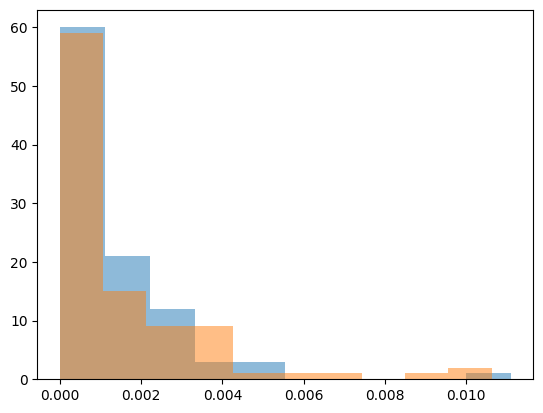